## Final Project Submission

Please fill out:
* Student name: *Rockson Noel*
* Student pace: *full time*
* Scheduled project review date/time: 
* Instructor name: *Wedter Jerome*
* Blog post URL: 


# Business Problem

In this project, I have been tasked with analyzing box office performance data to determine which types of films are currently the most successful.  
My goal is to provide clear, data-driven insights that will help the head of the company's new movie studio make informed decisions about what kinds of films to produce in order to maximize commercial success.

---

# Goal

I will:

- Explain the steps I took to explore and analyze the movie dataset  
- Identify which **genres, budgets, release windows, and other features** are most strongly associated with box office success  
- Visualize important **patterns and trends** in the film industry using charts and graphs  
- Use these insights to **recommend movie characteristics** (e.g. genre, budget range) that appear to be most profitable  


## Importing libraries & Define file paths

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sqlite3      

# Define file paths for all datasets
im_db = "./zippedData/im.db" # Path to the SQLite database containing IMDb data
tmdb_csv = "./zippedData/tmdb.movies.csv"  # Path to the CSV file containing movie metadata from TMDb (The Movie Database)
bom_csv = "./zippedData/bom.movie_gross.csv" # Path to the CSV file from Box Office Mojo with domestic gross revenue data for films
tn_budget_csv = "./zippedData/tn.movie_budgets.csv" # Path to the CSV file containing budget and revenue data for movies


## Connect to the Database & Loading Data

In [21]:
# Create a connection to the SQLite database
conn = sqlite3.connect(im_db)
cursor = conn.cursor()

In [22]:
tmdb_df = pd.read_csv(tmdb_csv)
bom_df = pd.read_csv(bom_csv)
budget_df = pd.read_csv(tn_budget_csv)

## Data Overview 

- `bom_df`: Contains box office revenues (domestic and international) for various films.

In [23]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


- `tmdb_df`: Includes movie metadata from TMDb such as popularity, language, and vote stats.

In [24]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


- `budget_df`: Lists production budgets and worldwide gross for selected movies.

In [25]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Display all tables & columns of each table in the database

In [26]:
# Show the tables in the database
query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""
tables = pd.read_sql_query(query, conn)
tables

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [27]:
query_columns = """ SELECT * 
                    FROM movie_basics
"""
col = pd.read_sql_query(query_columns, conn)
col.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [28]:
query_columns_2 = """ SELECT * 
                    FROM movie_ratings
"""
col_2 = pd.read_sql_query(query_columns_2, conn)
col_2.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

- `im_db`: SQLite database with detailed film information from IMDb.

In [29]:
imdb_df = pd.read_sql_query("""SELECT mb.primary_title, 
                                mb.runtime_minutes, 
                                mb.genres,
                                mr.averagerating, 
                                mr.numvotes 
                                                                 
                    FROM movie_basics as mb
                    JOIN movie_ratings as mr
                        ON mb.movie_id = mr.movie_id                  
    """, conn)
imdb_df.head(15)

,primary_title,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119
5,Bigfoot,NaN,"Horror,Thriller",4.1,32
6,Joe Finds Grace,83.0,"Adventure,Animation,Comedy",8.1,263
7,Pál Adrienn,136.0,Drama,6.8,451
8,So Much for Justice!,100.0,History,4.6,64
9,Cooper and Hemingway: The True Gen,180.0,Documentary,7.6,53


## Data Cleaning

### Missing values

In [30]:
# show how many missing values in the datasets
print(bom_df.isnull().sum(),"\n\n",imdb_df.isnull().sum(),"\n\n")

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64 

 primary_title         0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64 




In [31]:
print(tmdb_df.isnull().sum(),"\n\n",budget_df.isnull().sum())

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64 

 id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


### Filtering
- Retained only the columns relevant for **revenue and studio analysis**:
  - `studio`, `domestic_gross`, `foreign_gross`, `runtime_minutes`, `genres`.

### Handling Missing Values
- Replaced missing values in `studio` and `genres` with `'Unknown'`.
- Replaced missing values in `domestic_gross` with the column **median**.
- Removed commas from the `foreign_gross` column and converted it to `float`.
- Replaced missing values in `foreign_gross` with the column **median**.
- Replaced missing values in `df_2['runtime_minutes']` with the **median**.


In [32]:
bom_df.loc[:, 'studio'] = bom_df['studio'].fillna('Unknown')
bom_df.loc[:, 'domestic_gross'] = bom_df['domestic_gross'].fillna(bom_df['domestic_gross'].median())

# Remove all commas from the domestic_gross column
bom_df['foreign_gross'] = bom_df['foreign_gross'].astype(str).str.replace(',', '').astype(float)
bom_df.loc[:, 'foreign_gross'] = bom_df['foreign_gross'].fillna(bom_df['foreign_gross'].median())

imdb_df.loc[:, 'runtime_minutes'] = imdb_df['runtime_minutes'].fillna(imdb_df['runtime_minutes'].median())
imdb_df.loc[:, 'genres'] = imdb_df['genres'].fillna('Unknown')

# Convert the columns primary_title, movie and title to lowercase
imdb_df['primary_title'] = imdb_df['primary_title'].str.lower()
imdb_df['numvotes'] = imdb_df['numvotes'].astype(int)
bom_df['title'] = bom_df['title'].str.lower()
budget_df['movie'] = budget_df['movie'].str.lower()

# Replace the string '$' in the columns production_budget, domestic_gross and worldwide_gross and then convert to numeric
budget_df['production_budget'] = budget_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(int)


# Data Analysis

In [ ]:
# Display all columns for ascending order
# x = imdb_df[['primary_title', 'runtime_minutes', 'genres','averagerating', 'numvotes']][imdb_df['averagerating'] > imdb_df['averagerating'].mean()].sort_values(by=['numvotes','averagerating',], ascending=[False,False])
# x.groupby('genres')['numvotes'].sum().sort_values(ascending=False).head(30)

x = imdb_df[['primary_title', 'runtime_minutes', 'genres', 'averagerating', 'numvotes']]
x = x[imdb_df['averagerating'] > imdb_df['averagerating'].mean()]
x = x.sort_values(by=['numvotes', 'averagerating'], ascending=[False, False])

top_genres = x.groupby('genres')['numvotes'].sum().sort_values(ascending=False).head(30)
top_genres

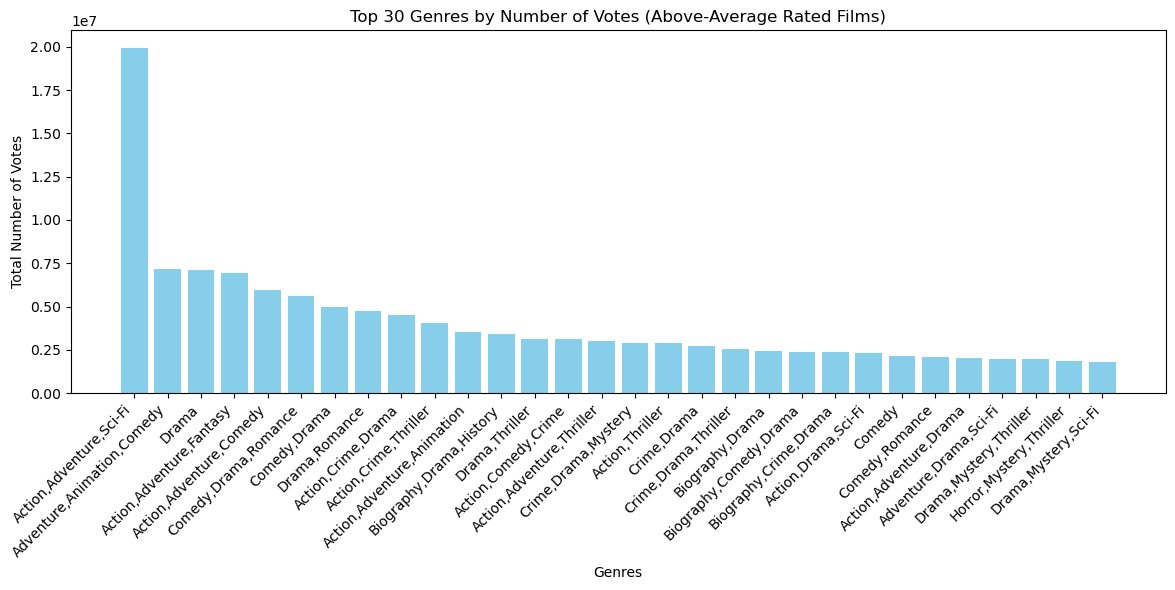

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top_genres.index, top_genres.values, color='skyblue')
ax.set_title('Top 30 Genres by Number of Votes (Above-Average Rated Films)')
ax.set_xlabel('Genres')
ax.set_ylabel('Total Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# imdb_df['averagerating'].hist(bins=20, edgecolor='black', figsize=(10, 6))

In [ ]:
bom_df[bom_df['title'].isin(imdb_df['primary_title'])]
imdb_df[imdb_df['primary_title'].isin(bom_df['title'])]

,primary_title,runtime_minutes,genres,averagerating,numvotes
31,wazir,103.0,"Action,Crime,Drama",7.1,15378
41,on the road,124.0,"Adventure,Drama,Romance",6.1,37886
47,the secret life of walter mitty,114.0,"Adventure,Comedy,Drama",7.3,275300
51,a walk among the tombstones,114.0,"Action,Crime,Drama",6.5,105116
52,jurassic world,124.0,"Action,Adventure,Sci-Fi",7.0,539338
...,...,...,...,...,...
73182,neighbors,90.0,"Comedy,Drama",7.6,18
73251,the gambler,121.0,"Action,Sci-Fi,Thriller",6.1,10
73732,gold,91.0,Drama,5.2,26
73775,sisters,91.0,"Action,Drama",4.7,14


In [ ]:
first_merge = pd.merge(imdb_df,bom_df, left_on='primary_title', right_on='title', how='inner')
pd.merge(imdb_df, budget_df,left_on='primary_title', right_on='movie', how='inner')

,primary_title,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",foodfight!,45000000,0,73706
1,the overnight,88.0,Unknown,7.5,24,21,"Jun 19, 2015",the overnight,200000,1109808,1165996
2,on the road,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",on the road,25000000,720828,9313302
3,the secret life of walter mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",the secret life of walter mitty,91000000,58236838,187861183
4,a walk among the tombstones,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",a walk among the tombstones,28000000,26017685,62108587
...,...,...,...,...,...,...,...,...,...,...,...
2930,earth,115.0,Documentary,7.3,49,36,"Apr 22, 2009",earth,47000000,32011576,116773317
2931,sisters,91.0,"Action,Drama",4.7,14,57,"Dec 18, 2015",sisters,30000000,87044645,106030660
2932,ali,110.0,Drama,7.7,79,45,"Dec 25, 2001",ali,109000000,58183966,87683966
2933,columbus,85.0,Comedy,5.8,5,93,"Aug 4, 2017",columbus,700000,1017107,1110511
